In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import fft
import cv2
from skimage import io

### Review of Computer Vision Lecture 1 / concepts:

#### 1.1 1D sine waves:

* What parameters define a sine wave?
* What is a "Fourier transform" in words?


#### 1.2 1D reciprocal space:

* What is the difference between "analog" and "digital" signal?
* What is the fundamental frequency? A harmonic? Nyquist frequency?
* What is reciprocal space? What are the axis (for 1D)?
* What does a plot of the FFT of a function in reciprocal space tell you?

# Computer Vision Lecture 2

## 2.1.0) 2D Waves & Images

#### Create a complicated 2D "image" with only 2 sine waves

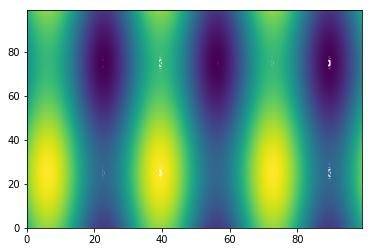

In [26]:
Ax = 2 # x-axis amplitude
Ay = 1 # y-axis amplitude

px = 24 # x-axis phase
py = 0 # y-axis phase

fx = 3 # x-axis frequency of the signal
fy = 1 # y-axis frequency of the signal

f_s = 100 # sample rate / "resolution"

x = np.arange(0,(f_s)) # points for x-axis
y = np.arange(0,(f_s)) # points for y-axis
X,Y = np.meshgrid(x,y)

f_xy = Ax*np.sin(2*np.pi*fx*(X/f_s) + px*np.pi/180) + Ay*np.sin(2*np.pi*fy*(Y/f_s) + py*np.pi/180)

plt.contour(X,Y,f_xy, 990)
plt.show()

#### Take-away: Any 2D image can be described by a sum of sine-waves.

----


## 2.2.0) 2D-Transforms

#### Assume some grayscale 2D-image of 10-by-10 pixels

|   |   |   |   |   |   |   |   |   |   |
|---|---|---|---|---|---|---|---|---|---|
| 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 1 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 4 | 3 | 4 | 8 | 0 | 0 | 0 |
| 0 | 0 | 3 | 9 | 9 | 9 | 9 | 3 | 0 | 0 |
| 0 | 0 | 5 | 9 | 9 | 9 | 9 | 3 | 0 | 0 |
| 0 | 0 | 6 | 9 | 9 | 9 | 9 | 2 | 0 | 0 |
| 0 | 0 | 7 | 9 | 9 | 9 | 9 | 1 | 0 | 0 |
| 0 | 0 | 2 | 5 | 7 | 8 | 6 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 |


#### Same image in reciprocal space (A_hk)
|    |       |       |      |      |      |      |      |      |      |      |       |      |
|----|-------|-------|------|------|------|------|------|------|------|------|-------|------|
| 5  | A_05  | P_05  |      |      |      |      |      |      |      |      | A_55  | P_55 |
| 4  |       |       |      |      |      |      |      |      |      |      |       |      |
| 3  |       |       |      |      |      |      |      |      |      |      |       |      |
| 2  |       |       |      |      |      |      |      |      |      |      |       |      |
| 1  | A_01  |       |      |      |      |      |      |      | A_41 |      |       |      |
| 0  | A_00  | P_00  | A_10 | P_10 | A_20 | P_20 | A_30 | P_30 | A_40 | P_40 |       |      |
| -1 |       |       |      |      |      |      |      |      |      |      |       |      |
| -2 |       |       |      |      |      |      |      |      |      |      |       |      |
| -3 |       |       |      |      |      |      |      |      |      |      |       |      |
| -4 |       |       |      |      |      |      |      |      |      |      |       |      |
| -5 | A_0-5 | P_0-5 |      |      |      |      |      |      |      |      | A_5-5 | P5-5 |
|    | 0     |       | 1    |      | 2    |      | 3    |      | 4    |      | 5     |      |

-----

#### Given these real space 2D sine-wave 'images' plot them in reciprocal space

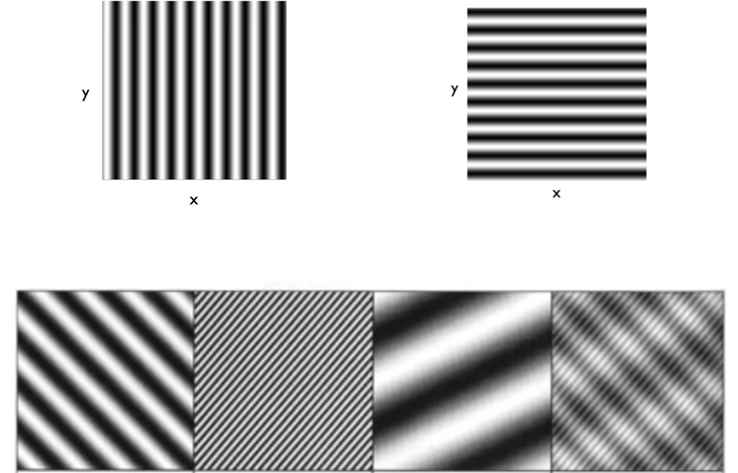

----

#### Now, on to real images

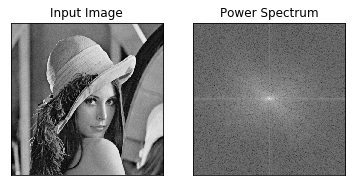

In [27]:


url ='https://i.stack.imgur.com/Je4Tk.png' # url to grayscale image
img = io.imread(url) # read image from url

f = np.fft.fft2(img) # take 2D-fft of grayscale image
fshift = np.fft.fftshift(f) # shift the DC component to be in the center of the power spectrum
power_spectrum = np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(power_spectrum, cmap = 'gray')
plt.title('Power Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

(512, 512)


C:\Users\RiggsSc\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


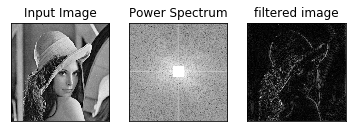

In [28]:
url ='https://i.stack.imgur.com/Je4Tk.png' # url to grayscale image
img = io.imread(url) # read image from url


f = np.fft.fft2(img) # fft to convert the image to freq domain
fshift = np.fft.fftshift(f) # shift the center

rows, cols = img.shape
crow,ccol = round(rows/2) , round(cols/2)

print(fshift.shape)

# remove the low frequencies by masking with a rectangular window of size 60x60
# High Pass Filter (HPF)
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0

power_spectrum = np.log(np.abs(fshift))

f_ishift = np.fft.ifftshift(fshift) # shift back (we shifted the center before)
img_back = np.fft.ifft2(f_ishift) # inverse fft to get the image back 
img_back = np.abs(img_back)

plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(power_spectrum, cmap = 'gray')
plt.title('Power Spectrum'), plt.xticks([]), plt.yticks([])

plt.subplot(133),plt.imshow(img_back, cmap = 'gray')
plt.title('filtered image'), plt.xticks([]), plt.yticks([])

plt.show()

### HW Questions

1. What does the "resolution" of a particular pixel in reciprocal space refer to?

2. What effect does a gaussian blur have on the reciprocal space resolution?

3. What information is missing from a Fourier Transform?

4. *Modify the above code to create rectangular a bandpass filter

5. *Using the code from question 4, now make the bandpass filter tunable (hint: define a bandpass function)

6. * *Modify the function to create a tunable circular bandpass filter 
